本次实验以AAAI 2014会议论文数据为基础，实现或调用无监督聚类算法，了解聚类方法。

### 实验介绍
每年国际上召开的大大小小学术会议不计其数，发表了非常多的论文。在计算机领域的一些大型学术会议上，一次就可以发表涉及各个方向的几百篇论文。按论文的主题、内容进行聚类，有助于人们高效地查找和获得所需要的论文。本案例数据来源于AAAI 2014上发表的约400篇文章，由[UCI](https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers!)公开提供，提供包括标题、作者、关键词、摘要在内的信息，希望大家能根据这些信息，合理地构造特征向量来表示这些论文，并设计实现或调用聚类算法对论文进行聚类。最后也可以对聚类结果进行观察，看每一类都是什么样的论文，是否有一些主题。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re

In [2]:
df_row = pd.read_csv('./data/[UCI] AAAI-14 Accepted Papers - Papers.csv')
df = df_row.drop(['groups','topics'], axis = 1)
df['keywords'] = df.keywords.str.replace("\n"," ")
df['authors'] = df.authors.str.replace(' and', ',')
df_con = df['title'] + ' ' + df['authors'] + ' ' + df['keywords'] + ' ' + df['abstract']
print(type(df_con.values))
print(df_con.values.shape)
con = df_con.values
con.shape

<class 'numpy.ndarray'>
(398,)


(398,)

### 10 clusters

In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_con.values.tolist())
print(X.shape)
predict_y = KMeans(n_clusters = 10, random_state = 0).fit_predict(X)
print(type(predict_y))
print(predict_y.shape)
print(predict_y)
print(silhouette_score(X, predict_y))

(398, 7527)
<class 'numpy.ndarray'>
(398,)
[0 0 5 3 2 2 1 9 3 9 6 1 2 1 1 3 2 2 2 9 8 1 6 3 4 3 2 6 7 1 8 6 1 1 1 3 2
 8 0 3 6 1 3 4 8 0 2 1 1 9 3 9 2 9 1 7 6 7 8 1 5 1 7 8 1 1 2 1 4 2 5 1 2 4
 3 2 1 7 3 8 1 1 2 6 2 3 2 8 9 1 2 7 2 8 0 6 2 1 0 7 4 3 1 3 1 1 1 4 2 1 7
 1 2 9 8 8 3 7 1 2 4 9 8 8 7 8 2 4 0 4 1 1 1 1 8 5 3 9 4 9 4 9 2 0 0 8 6 1
 4 1 0 2 2 8 2 8 7 4 2 1 1 7 9 2 1 1 7 9 4 8 2 7 8 4 0 1 6 7 1 1 1 1 1 1 2
 8 9 1 7 1 1 5 2 2 9 1 4 1 1 0 4 6 9 2 3 8 6 9 2 2 1 2 1 2 1 1 4 4 1 9 8 2
 1 1 1 9 9 8 3 9 1 1 0 7 7 1 1 6 0 1 2 9 3 0 7 8 1 6 1 9 6 9 8 2 1 1 1 2 2
 0 2 1 3 1 2 1 6 0 7 3 5 1 1 1 1 3 7 1 2 4 1 4 1 6 1 9 7 0 0 6 1 4 6 2 1 5
 3 0 0 0 1 1 2 8 1 2 3 5 6 1 2 3 4 7 6 4 1 1 0 8 7 1 9 1 0 1 2 2 0 2 2 2 2
 3 8 0 2 7 5 0 1 1 7 5 2 6 4 7 2 9 2 7 1 3 1 1 1 8 2 8 1 8 1 1 2 0 5 5 1 1
 1 1 2 1 7 1 4 4 1 0 1 0 1 7 8 9 1 6 1 6 7 4 1 7 3 1 9 0]
0.002156245245676903


### 控制n-grams and max features

In [4]:
n_vectorizer = TfidfVectorizer(max_features=500,ngram_range=(1,3))
#n_vectorizer = TfidfVectorizer(ngram_range=(1,3))
n_X = n_vectorizer.fit_transform(df_con.values.tolist())
print(n_X.shape)
pred_n_y = KMeans(n_clusters = 10, random_state = 0).fit_predict(n_X)
print(type(pred_n_y))
print(pred_n_y.shape)
print(pred_n_y)
print(silhouette_score(n_X, pred_n_y))

(398, 500)
<class 'numpy.ndarray'>
(398,)
[3 3 9 7 8 2 1 0 1 2 6 1 8 9 1 7 1 7 2 2 9 1 9 2 5 0 1 1 9 7 1 5 8 7 4 1 8
 4 8 9 8 1 6 6 9 8 8 8 0 8 7 8 8 2 6 1 1 4 2 6 9 1 2 9 1 1 1 1 8 8 1 1 6 1
 2 8 1 4 2 9 7 7 9 2 1 2 8 6 6 2 8 5 5 9 8 6 2 4 7 4 1 7 0 6 7 1 6 5 2 5 9
 1 8 1 1 1 8 4 6 7 7 8 6 7 9 2 1 5 3 5 1 1 6 1 9 1 7 2 5 8 1 8 7 8 3 8 5 6
 5 4 1 2 6 9 6 1 9 5 3 1 1 9 0 6 1 7 9 6 5 9 1 1 5 0 8 6 7 1 7 7 1 1 1 1 8
 1 2 9 9 4 4 1 6 6 8 7 5 1 1 6 1 1 0 7 8 1 1 2 3 3 6 8 7 7 1 9 5 6 9 2 1 8
 6 6 1 8 0 1 7 6 7 1 6 1 9 1 7 1 1 1 6 0 1 0 9 4 7 4 6 8 1 2 4 2 8 7 1 8 2
 8 6 9 9 2 6 4 5 2 2 8 1 6 9 8 7 7 2 7 8 1 2 5 1 6 1 2 9 1 6 2 8 1 6 1 1 9
 0 2 3 3 6 1 8 9 4 2 7 1 5 6 6 1 5 9 6 5 8 1 3 6 9 1 8 6 0 4 1 8 6 3 9 2 1
 7 1 2 9 9 1 8 1 1 9 1 8 6 5 4 1 8 2 8 1 8 1 6 1 1 1 9 1 9 6 6 8 6 1 1 1 1
 4 1 8 7 5 6 1 5 6 1 4 0 6 1 9 2 1 1 0 1 4 5 6 8 2 1 0 3]
0.022356897039433218


### 3 clusters

In [5]:
vectorizer1 = TfidfVectorizer()
X1 = vectorizer1.fit_transform(df['abstract'].values.tolist())
print(X1.shape)
pred_y = KMeans(n_clusters = 3, random_state = 0).fit_predict(X1)
print(type(pred_y))
print(pred_y.shape)
print(pred_y)
print(silhouette_score(X, pred_y))

(398, 5804)
<class 'numpy.ndarray'>
(398,)
[1 1 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 0 2 2
 0 1 2 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 0 2 2 2 2 2 1 1 2 1 2 2 1 1 0 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 0 2 1 2 1 2 2 2 2 1 2 2 2
 2 0 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 1 0 1 2 2 2 2 1
 1 1 2 2 2 1 0 2 1 2 2 2 2 2 1 2 2 2 1 1 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2
 2 2 1 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 2
 2 2 1 2 2 2 1 2 2 2 2 2 2 2 0 2 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2
 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 0 2 2 1 1 2 0 1]
0.003238028938353026


#### 设置groups内容为label标签，在可视化显示，便于分析分类
方法是将第一个括号里的简写做为标签，忽略其余括号。  
过程中发现groups有缺失值，观察数据后将toptics里":"前面的值填充缺失值。  

In [6]:
df_row.info()
index = df_row[df_row.groups.isnull()].index
for i in index:
    df_row.loc[i,'groups'] = '(' + df_row.loc[i,'topics'].split(':')[0] + ')'
print(df_row.iloc[211,2])
print(df_row.iloc[340,2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     398 non-null    object
 1   authors   398 non-null    object
 2   groups    396 non-null    object
 3   keywords  398 non-null    object
 4   topics    394 non-null    object
 5   abstract  398 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB
(NMLA)
(KRR)


In [7]:
label = []
for i in range(len(df)):
    pat = re.match(".*\((.*)\).*", df_row.loc[i,'groups'])
    #print(pat.group(1))
    label.append(pat.group(1))
print(label)
print(len(label))

['NMLA', 'AIW', 'GTEP', 'NLPTM', 'KRR', 'VIS', 'MLA', 'MLA', 'AIW', 'NMLA', 'HSO', 'NMLA', 'NMLA', 'AIW', 'PS', 'APP', 'APP', 'CSAI', 'AIW', 'VIS', 'CM', 'KRR', 'MAS', 'NMLA', 'NMLA', 'HAI', 'CSAI', 'HSO', 'AIW', 'APP', 'GTEP', 'HSO', 'NMLA', 'NMLA', 'GTEP', 'KRR', 'MLA', 'APP', 'AIW', 'GTEP', 'NMLA', 'AIW', 'MLA', 'NMLA', 'GTEP', 'KRR', 'NMLA', 'HAI', 'AIW', 'HSO', 'AIW', 'AIW', 'AIW', 'NLPML', 'HSO', 'AIW', 'GPIE', 'GTEP', 'ROB', 'NMLA', 'GTEP', 'NMLA', 'AIW', 'APP', 'AIW', 'GTEP', 'KRR', 'GTEP', 'APP', 'KRR', 'GTEP', 'KRR', 'NMLA', 'MLA', 'APP', 'CSAI', 'KRR', 'GTEP', 'KRR', 'GTEP', 'CSAI', 'NLPTM', 'AIW', 'MLA', 'MLA', 'AIW', 'NMLA', 'MAS', 'MLA', 'MLA', 'NMLA', 'CSAI', 'PS', 'CM', 'MLA', 'HSO', 'VIS', 'CSAI', 'MLA', 'GPIE', 'KRR', 'AIW', 'MLA', 'AIW', 'RU', 'SCS', 'GTEP', 'KRR', 'MLA', 'KRR', 'GTEP', 'KRR', 'MLA', 'APP', 'MAS', 'MAS', 'NLPTM', 'GPIE', 'NMLA', 'CS', 'APP', 'NMLA', 'CS', 'PS', 'GTEP', 'APP', 'NMLA', 'PS', 'NMLA', 'APP', 'NMLA', 'AIW', 'RU', 'NMLA', 'GTEP', 'GTEP', '

### PCA
使用max_features = 500, n-gram在1~3之间的向量。
PCA降维为2维。

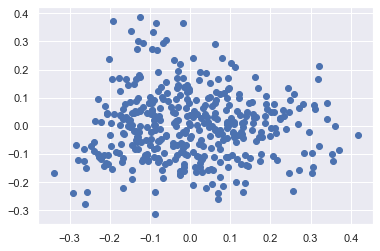

In [8]:
X2array = n_X.toarray()
pca = PCA(n_components=2)
x = pca.fit_transform(X2array)
plt.scatter(x[:, 0], x[:, 1],marker='o')
plt.show()

kmeans 分类为3类，并作图

No handles with labels found to put in legend.


<class 'numpy.ndarray'>
(398,)
[0 0 1 1 2 0 1 0 1 0 2 1 0 2 2 1 1 1 0 0 1 1 1 0 2 2 1 1 2 1 1 2 0 0 1 2 0
 1 0 2 0 2 0 1 1 0 0 0 0 2 2 0 1 0 1 1 2 2 2 0 1 1 0 1 1 1 2 2 0 0 2 2 0 1
 1 0 1 2 1 1 1 1 1 0 1 2 0 2 0 0 0 2 2 1 0 2 0 1 1 2 2 2 2 1 1 1 1 2 0 2 1
 1 0 2 1 2 0 2 0 0 1 0 0 2 1 0 2 2 0 2 0 2 0 1 1 2 0 0 2 0 1 1 0 0 0 1 2 1
 2 2 1 0 2 2 0 2 1 2 0 1 1 1 2 2 1 1 1 0 2 2 2 1 2 2 0 1 0 1 2 2 2 1 1 1 2
 1 0 1 1 1 1 2 2 0 0 1 2 1 1 0 2 1 2 0 0 1 1 2 0 2 1 0 2 1 1 1 2 0 1 1 1 0
 0 0 2 0 2 1 1 0 2 1 0 1 1 1 2 2 1 2 0 0 1 0 2 2 1 2 1 0 1 0 1 0 0 2 1 0 0
 0 1 1 0 0 0 2 2 0 2 0 1 0 1 0 2 1 0 2 0 2 0 2 0 2 1 0 1 1 0 2 0 1 2 1 1 1
 2 2 0 0 1 1 0 1 1 0 0 2 2 1 1 0 2 1 2 2 0 1 0 0 1 2 0 0 2 2 1 0 0 0 1 0 0
 1 1 0 1 1 2 0 1 2 1 1 0 2 2 2 2 0 0 2 2 2 2 0 1 1 2 1 1 1 1 1 0 0 1 1 2 1
 1 1 0 1 2 1 1 1 1 1 1 0 1 1 1 0 1 1 0 2 2 2 0 0 2 1 0 0]
0.36124122544631043


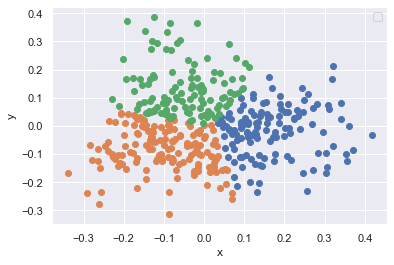

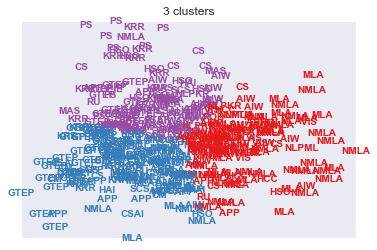

In [9]:
p_y = KMeans(n_clusters = 3, random_state = 0).fit_predict(x)
print(type(p_y))
print(p_y.shape)
print(p_y)
print(silhouette_score(x, p_y))
fig = plt.figure()
for i in range(3):
    plt.scatter(x[p_y==i,0], x[p_y==i,1])
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x_min, x_max = np.min(x, 0), np.max(x, 0)
data = (x - x_min) / (x_max - x_min)
for i in range(len(df)):
    plt.text(data[i,0], data[i,1], label[i], 
                 color=plt.cm.Set1(p_y[i]/5.),
                 fontdict={'weight': 'bold', 'size': 10},
             verticalalignment='center',horizontalalignment='center')
plt.xticks([])
plt.yticks([])
plt.title('3 clusters')
plt.show(fig)

kmeans 分10类，并做图。

No handles with labels found to put in legend.


<class 'numpy.ndarray'>
(398,)
[7 7 6 0 9 4 8 4 0 7 9 8 4 9 6 0 2 2 1 1 5 6 8 4 3 9 2 8 0 0 5 3 4 4 6 6 4
 5 1 6 1 0 4 0 5 0 1 4 4 9 0 4 2 4 2 8 6 6 9 4 6 2 4 2 8 5 6 3 4 4 6 9 4 2
 2 4 5 6 2 6 8 2 2 4 2 9 1 9 4 4 1 0 6 5 4 6 1 5 2 6 6 9 0 8 8 8 2 3 1 6 5
 8 4 0 5 9 1 6 2 2 5 4 1 0 5 1 9 3 7 6 2 9 2 5 5 6 4 1 3 1 8 2 0 4 7 2 6 2
 6 6 2 4 9 6 1 6 8 3 1 5 2 8 9 9 8 2 5 0 6 0 6 5 3 9 9 2 0 8 6 0 6 5 2 2 0
 8 0 8 8 5 5 0 9 1 1 8 3 8 8 7 0 6 9 0 1 6 6 0 4 9 2 1 0 8 8 8 3 4 6 2 8 1
 4 4 6 1 9 8 2 4 0 8 7 8 0 8 0 6 2 6 0 4 2 1 0 6 8 6 2 4 8 1 5 4 1 0 8 9 1
 7 2 6 0 0 1 6 3 1 9 4 6 4 5 4 0 0 4 9 1 9 4 3 4 3 2 1 8 2 7 9 4 8 6 0 5 5
 9 9 1 7 8 2 2 8 8 1 4 6 3 2 2 4 6 8 9 3 4 5 7 4 6 9 4 4 9 6 8 4 7 4 8 1 0
 0 6 7 6 8 6 2 8 6 8 8 2 0 3 6 9 1 1 9 6 0 6 2 5 6 9 8 5 5 2 2 1 7 6 8 0 8
 6 5 7 0 6 0 8 6 2 2 6 1 2 5 0 9 2 8 4 6 6 6 4 4 0 8 4 7]
0.3501026652657142


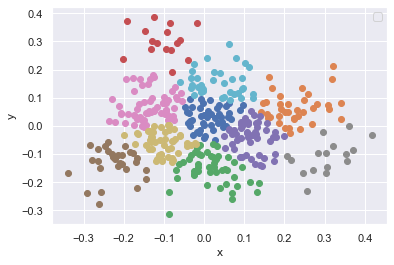

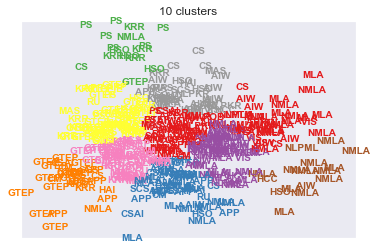

In [10]:
p_y = KMeans(n_clusters = 10, random_state = 0).fit_predict(x)
print(type(p_y))
print(p_y.shape)
print(p_y)
print(silhouette_score(x, p_y))
fig = plt.figure()
ax = plt.subplot(111)
for i in range(10):
    plt.scatter(x[p_y==i,0], x[p_y== i,1])#, s=100)#,c=colors_list[i])#,label=labels_list[i])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()



x_min, x_max = np.min(x, 0), np.max(x, 0)
data = (x - x_min) / (x_max - x_min)
for i in range(len(df)):
    plt.text(data[i,0], data[i,1], label[i], 
                 color=plt.cm.Set1(p_y[i]/10.),
                 fontdict={'weight': 'bold', 'size': 10},
             verticalalignment='center',horizontalalignment='center')
plt.xticks([])
plt.yticks([])
plt.title('10 clusters')
plt.show(fig)

### T-SNE 降维 
同样使用max_features = 500, n-gram在1~3之间的向量。
t-sne降维为2维。  
kmeans分10类，并观察。

No handles with labels found to put in legend.


(398, 2)
<class 'numpy.ndarray'>
(398,)
[4 4 7 2 1 3 5 1 3 3 3 5 9 1 0 2 5 2 3 3 7 5 3 9 0 0 5 3 2 8 7 3 9 2 6 0 4
 6 2 7 9 3 2 9 7 9 8 9 8 8 5 1 2 6 8 2 5 8 3 9 7 5 2 2 1 5 6 6 5 5 1 1 2 5
 3 1 5 6 3 6 2 3 2 3 9 3 8 0 1 9 8 0 0 7 8 3 1 6 2 6 0 4 6 2 5 5 8 0 9 0 7
 5 1 4 7 0 6 8 4 4 5 4 4 2 7 8 9 0 4 0 5 1 4 5 7 1 2 3 0 1 3 1 0 2 4 2 5 4
 0 6 2 1 7 0 4 8 2 0 4 1 4 7 6 6 4 2 7 0 0 0 0 2 0 6 6 5 2 2 1 5 4 5 5 8 4
 5 3 8 7 5 6 6 6 8 9 5 1 2 5 4 5 3 1 3 3 7 5 3 4 4 4 8 5 7 5 2 0 9 7 3 5 9
 8 0 6 9 6 4 8 4 5 2 4 8 2 4 6 5 2 5 1 3 7 4 2 6 2 5 4 1 3 3 7 8 8 1 2 1 9
 9 2 7 2 3 9 6 3 9 3 2 1 4 7 9 5 4 3 3 9 0 9 0 9 3 8 3 2 5 4 3 8 2 3 5 5 7
 2 3 4 4 8 5 9 7 8 9 2 1 0 2 4 5 0 2 3 0 8 5 4 7 7 7 1 2 6 8 0 9 4 4 7 9 5
 3 0 4 7 7 6 2 6 1 7 7 0 3 0 6 3 9 9 1 5 1 5 4 5 6 8 8 5 6 4 2 9 4 1 5 9 5
 6 5 9 2 5 2 0 0 9 2 7 0 4 5 7 1 5 2 4 3 6 0 4 2 1 6 3 4]
0.33964577


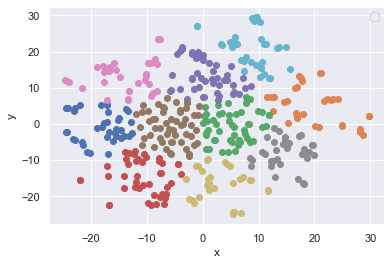

In [12]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
data = tsne.fit_transform(X2array)
print(data.shape)
row, features_num = X.shape
pre_y = KMeans(n_clusters = 10, random_state = 0).fit_predict(data)
print(type(pre_y))
print(pre_y.shape)
print(pre_y)
print(silhouette_score(data, pre_y))
fig = plt.figure()
ax = plt.subplot(111)
for i in range(10):
    plt.scatter(data[pre_y==i,0], data[pre_y== i,1])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()